In [1]:
!module list
import sys, os
sys.path.append("/home/u17/jiachuanxu/python3.6_virtualenv/lib/python3.6/site-packages")
os.chdir("/home/u17/jiachuanxu/CosmoLike/DESxPlanck")


Currently Loaded Modules:
  1) autotools   3) gnu8/8.3.0       5) ohpc      7) python/3.6/3.6.5
  2) prun/1.3    4) openmpi3/3.1.4   6) gsl/2.6   8) R/4.1.0

 



In [2]:
import argparse
import numpy as np
import numpy.linalg as LA
from getdist import plots, MCSamples
import getdist as gd
from chainconsumer import ChainConsumer
import matplotlib.pyplot as plt
import yaml
import numpy as np
import pandas as pd
from run_cosmolike_3x2pt import *


*** Adopted CosmoLike lib file: /home/u17/jiachuanxu/CosmoLike/DESxPlanck/like_mix_6x2pt.so



In [3]:
#chain_file = "/home/u17/jiachuanxu/CosmoLike/DESxPlanck/chains/DESY1_3x2_treecorr_test_ocelote"
#chain_file = "/groups/timeifler/jiachuanxu/temp/DESY1_3x2pt_treecorr_test"
chain_file = ["/groups/timeifler/jiachuanxu/temp/DESY1_3x2pt_public_test",
              "/groups/timeifler/jiachuanxu/temp/DESY1_3x2pt_treecorr_test"]
Nwalker, Nsteps = 560, 12000
names = ["omega_m", "sigma_8", "n_s", "omega_b", "h0", 
         "bias_0", "bias_1", "bias_2", "bias_3", "bias_4",
         "lens_z_bias_0", "lens_z_bias_1", "lens_z_bias_2", "lens_z_bias_3", "lens_z_bias_4",
         "source_z_bias_0", "source_z_bias_1", "source_z_bias_2", "source_z_bias_3", 
         "shear_m_0", "shear_m_1", "shear_m_2", "shear_m_3", 
         "p_ia_0", "p_ia_1", "sigma_8_1", "log_like"]
dtypes = []
for name in names:
    dtypes.append((name, np.float32))
print("Chain dtype = {}".format(dtypes))
data = np.zeros(Nwalker*Nsteps, dtype=dtypes)
labels =  ["\Omega_{\mathrm{m}}", "\sigma_8", "n_s", "\Omega_b", "h",
           "b_0", "b_1", "b_2", "b_3", "b_4",
           "\Delta z^{len}_0", "\Delta z^{len}_1", "\Delta z^{len}_2", "\Delta z^{len}_3", "\Delta z^{len}_4", 
           "\Delta z^{src}_0", "\Delta z^{src}_1", "\Delta z^{src}_2", "\Delta z^{src}_3",
           "m_0", "m_1", "m_2", "m_3", 
           "p^{IA}_0", "p^{IA}_1", "S8", "loglike"]
print("Reading chain...")
if os.path.isfile(chain_file+".npy"):
    data = np.load(chain_file+".npy")
else:
    # load samples from MontePython
    #with open(chain_file, "r") as fp:
    #    for i,line in enumerate(fp.readlines()):
    #        if(i>0):
    #            for j,num in enumerate(line.split()):
    #                data[i-1][j] = float(num)
    %time chain_df = pd.read_csv(chain_file, sep='\s+', engine='c', header=0, names=names, index_col=False)
    data = chain_df.values
    del chain_df
    np.save(chain_file+".npy", data)

Chain dtype = [('omega_m', <class 'numpy.float32'>), ('sigma_8', <class 'numpy.float32'>), ('n_s', <class 'numpy.float32'>), ('omega_b', <class 'numpy.float32'>), ('h0', <class 'numpy.float32'>), ('bias_0', <class 'numpy.float32'>), ('bias_1', <class 'numpy.float32'>), ('bias_2', <class 'numpy.float32'>), ('bias_3', <class 'numpy.float32'>), ('bias_4', <class 'numpy.float32'>), ('lens_z_bias_0', <class 'numpy.float32'>), ('lens_z_bias_1', <class 'numpy.float32'>), ('lens_z_bias_2', <class 'numpy.float32'>), ('lens_z_bias_3', <class 'numpy.float32'>), ('lens_z_bias_4', <class 'numpy.float32'>), ('source_z_bias_0', <class 'numpy.float32'>), ('source_z_bias_1', <class 'numpy.float32'>), ('source_z_bias_2', <class 'numpy.float32'>), ('source_z_bias_3', <class 'numpy.float32'>), ('shear_m_0', <class 'numpy.float32'>), ('shear_m_1', <class 'numpy.float32'>), ('shear_m_2', <class 'numpy.float32'>), ('shear_m_3', <class 'numpy.float32'>), ('p_ia_0', <class 'numpy.float32'>), ('p_ia_1', <class 

In [7]:
data = chain_df.values

In [15]:
data.dtype

dtype('float64')

In [11]:
idx = np.argmax(data[:,-1])
test_point = np.array([data[idx][i] for i in range(len(data[idx])-2)])
print("maximum likelihood id = %d/%d, loglike=%.2f"%(idx, len(data[:,-1]), data[idx,-1]))
print("params of maximum likelihood point: {}".format(test_point))
#del data

maximum likelihood id = 6038878/6720000, loglike=-252.50
params of maximum likelihood point: [ 2.46128952e-01  8.96352414e-01  1.00039393e+00  5.43777889e-02
  8.27941770e-01  1.33190695e+00  1.54594866e+00  1.53932155e+00
  1.88111247e+00  1.89113950e+00  7.51280721e-03 -4.89915927e-03
  6.34713717e-03  1.83764665e-03 -3.80277557e-03  3.33357678e-03
 -3.08742719e-02  1.14047688e-02 -3.40745405e-02 -2.56411448e-03
  2.67361485e-02 -1.39254889e-03  1.71155451e-02  6.01215584e-01
 -1.30509282e+00]


Removed no burn in


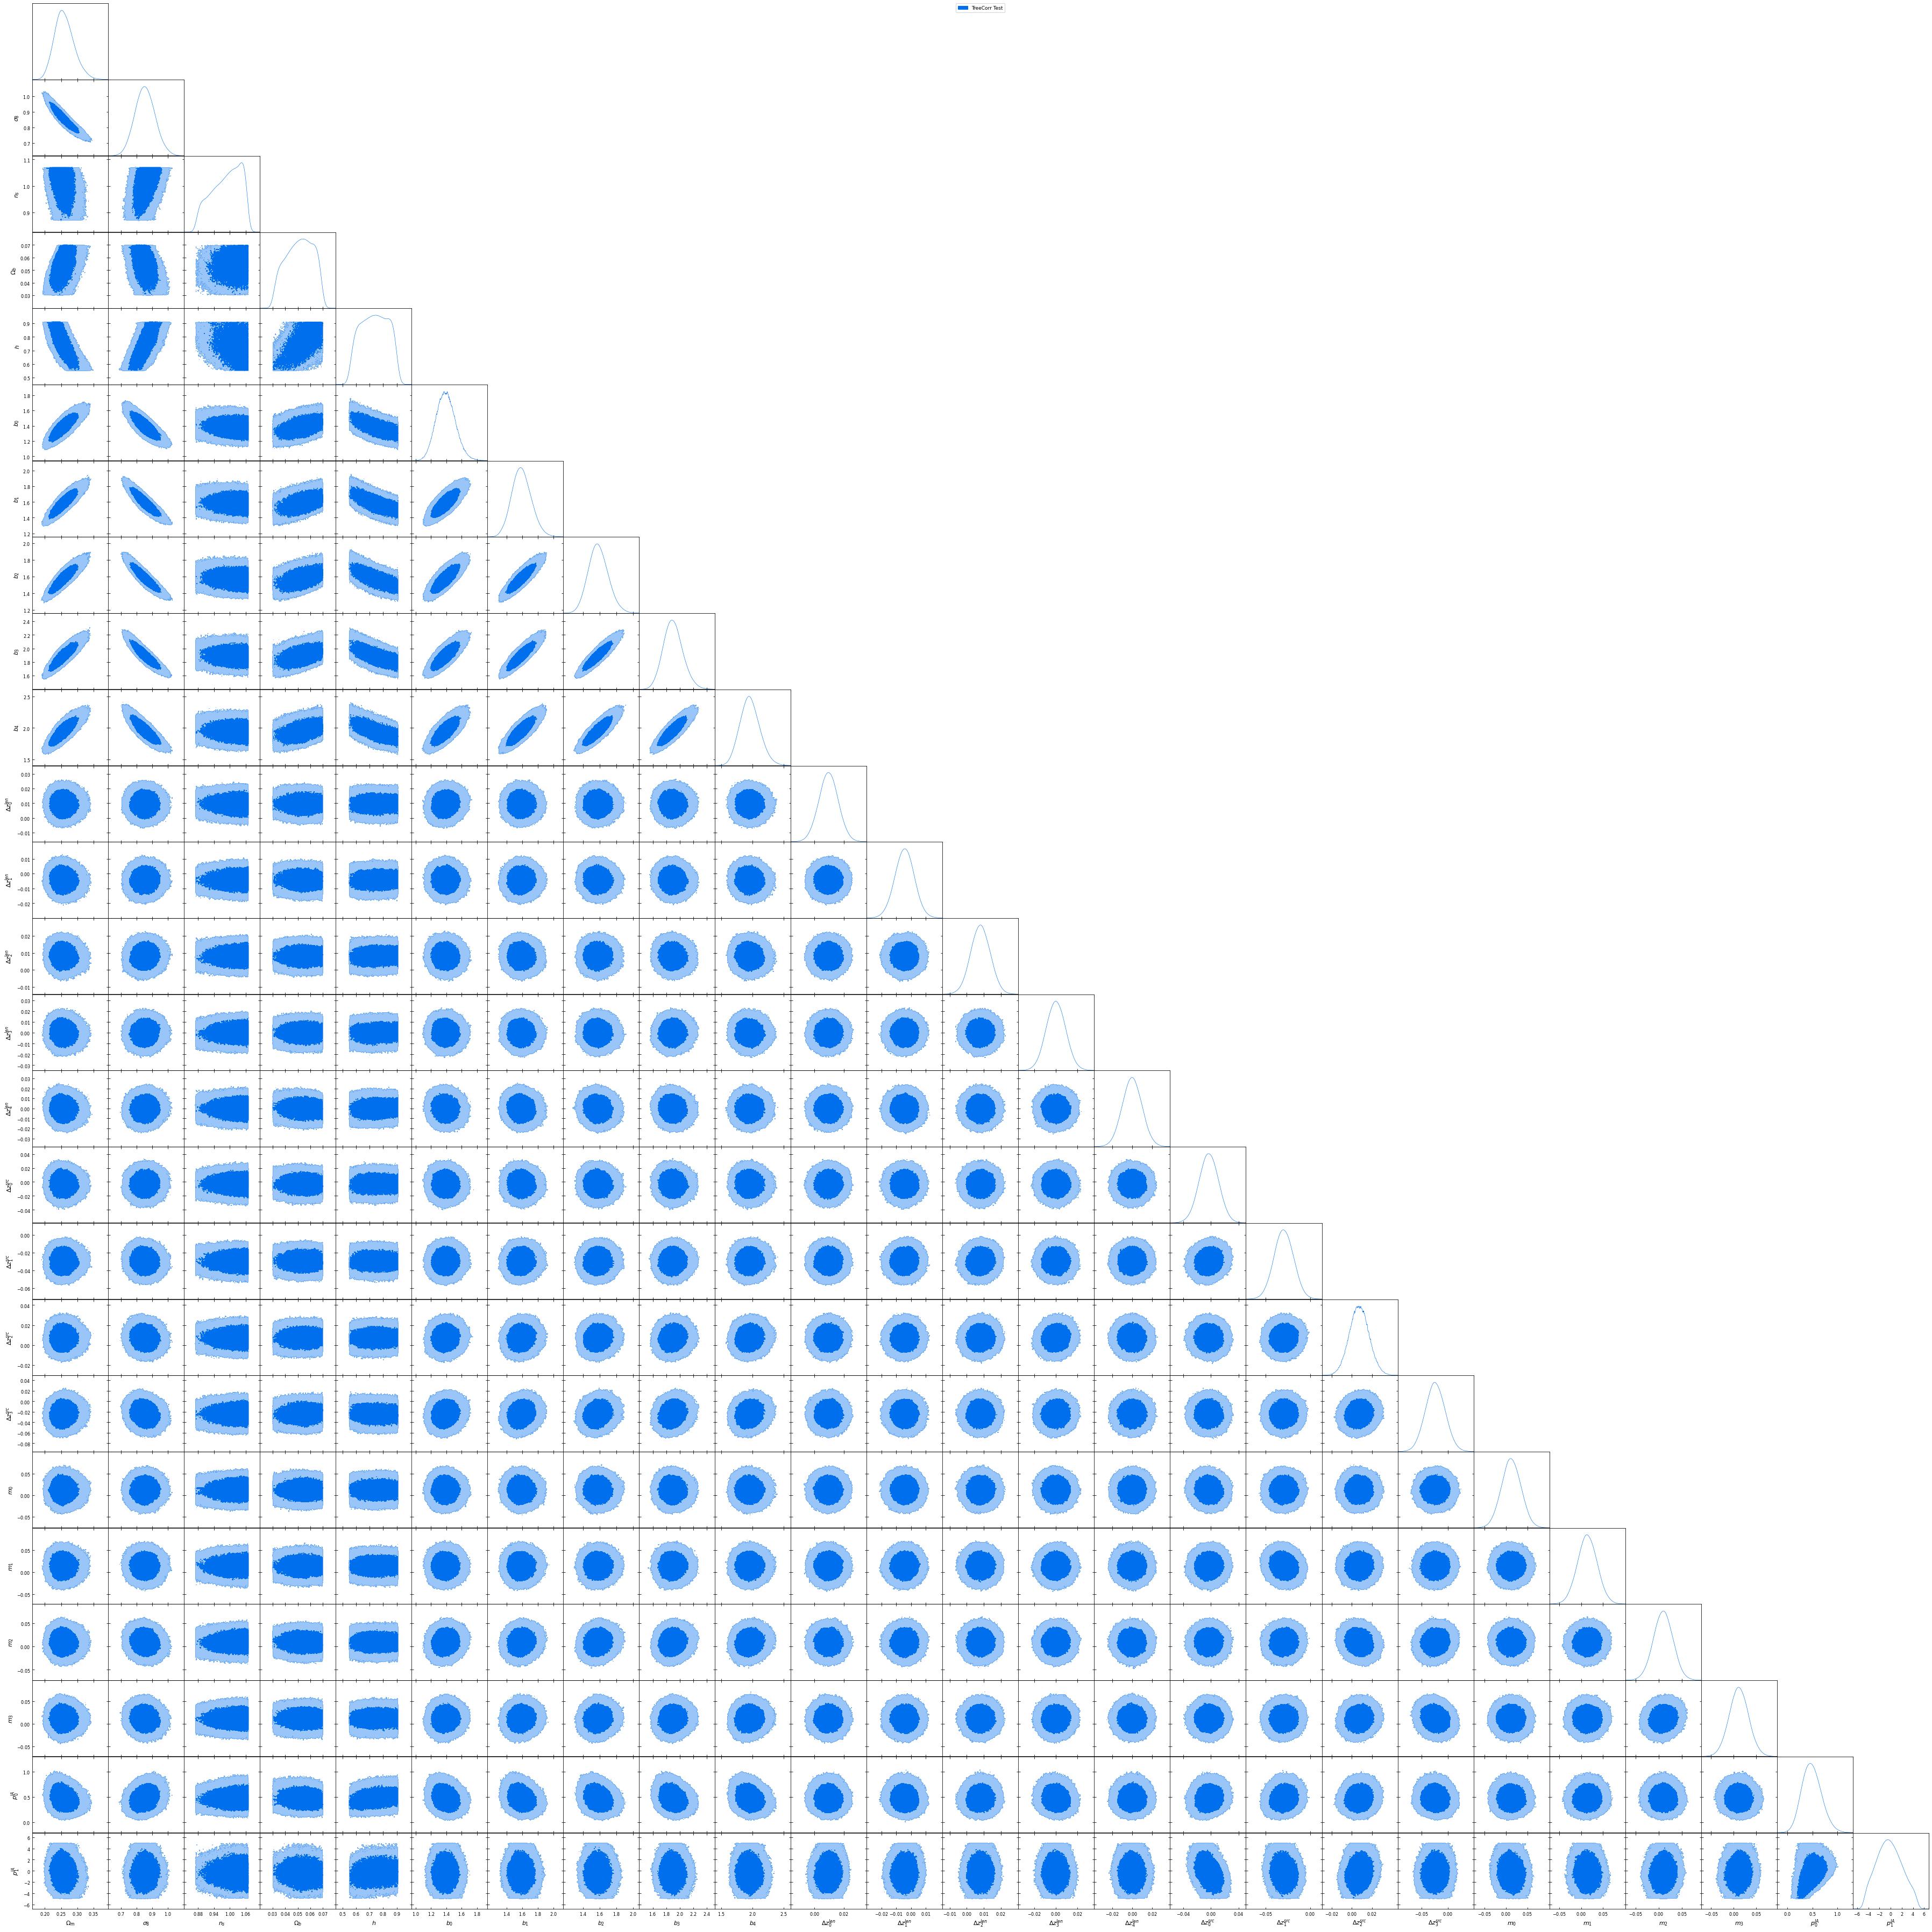

In [12]:
# structured array to ndarray 
#data_ndarray = data.copy().view((data.dtype[0], len(data.dtype.names)))
samples = MCSamples(samples=data[3360000:,:-2],names = names[:-2], labels = labels[:-2], label='TreeCorr')
#del data_ndarray
#samples = gd.mcsamples.loadMCSamples(chain_file)
# plot
g = plots.get_subplot_plotter()
g.triangle_plot([samples, ], filled=True, legend_labels=["TreeCorr Test", ])

In [13]:
g.export("notebooks/figs/PublicOnly_burnin3.36M.png")

## Plot Chain Steps

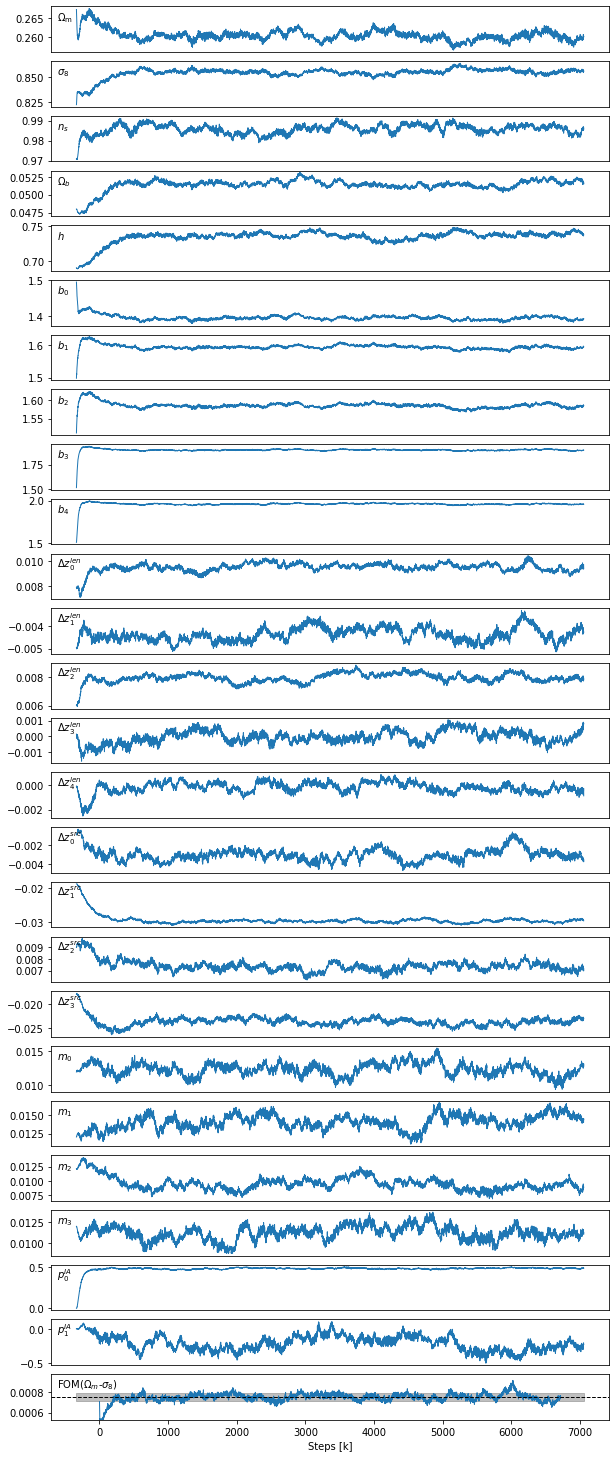

In [18]:
Nbins = Nwalker*int(Nsteps/1000)
steps = range(Nbins)
FoM_DM = np.zeros(Nbins)
fig, axes = plt.subplots(26,1, figsize=(10,26))
for i in range(25):
    name = names[i]
    label = labels[i]
    values = np.zeros(Nbins)
    for j in range(1000):
        values += data[j::1000, i]
    values /= 1000
    axes[i].plot(steps, values, lw=1)
    axes[i].set_xticks([])
    axes[i].text(0.01, 0.7, r'$%s$'%label, transform=axes[i].transAxes)
# FoM
#data_ndarray = data.copy().view((data.dtype[0], len(data.dtype.names)))
for i in range(Nbins):
    FoM_DM[i] = LA.det(np.cov(data[i*1000:(i+1)*1000,0:2], rowvar=False))**0.5
#del data_ndarray
axes[25].plot(steps, FoM_DM, lw=1)
axes[25].set_xlabel("Steps [k]")
axes[25].text(0.01, 0.7, r"FOM($\Omega_m$-$\sigma_8$)", transform=axes[25].transAxes)
FoM_DM_exp = np.median(FoM_DM[int(Nbins/2):])
axes[25].axhline(FoM_DM_exp, ls='--', color='k', lw=1)
axes[25].fill_between(axes[25].get_xlim(), FoM_DM_exp*0.95, FoM_DM_exp*1.05, color='grey', alpha=0.5)
axes[25].set_ylim([FoM_DM_exp*0.7, FoM_DM_exp*1.3])
#plt.show()
plt.savefig("notebooks/figs/chain_steps_public.png", dpi=300)

In [ ]:
chain_file = ["/groups/timeifler/jiachuanxu/temp/DESY1_3x2pt_public_test",
              "/groups/timeifler/jiachuanxu/temp/DESY1_3x2pt_treecorr_test"]
names = ["omega_m", "sigma_8", "n_s", "omega_b", "h0", 
         "bias_0", "bias_1", "bias_2", "bias_3", "bias_4",
         "lens_z_bias_0", "lens_z_bias_1", "lens_z_bias_2", "lens_z_bias_3", "lens_z_bias_4",
         "source_z_bias_0", "source_z_bias_1", "source_z_bias_2", "source_z_bias_3", 
         "shear_m_0", "shear_m_1", "shear_m_2", "shear_m_3", 
         "p_ia_0", "p_ia_1", "sigma_8_1", "log_like"]
labels =  ["\Omega_{\mathrm{m}}", "\sigma_8", "n_s", "\Omega_b", "h",
           "b_0", "b_1", "b_2", "b_3", "b_4",
           "\Delta z^{len}_0", "\Delta z^{len}_1", "\Delta z^{len}_2", "\Delta z^{len}_3", "\Delta z^{len}_4", 
           "\Delta z^{src}_0", "\Delta z^{src}_1", "\Delta z^{src}_2", "\Delta z^{src}_3",
           "m_0", "m_1", "m_2", "m_3", 
           "p^{IA}_0", "p^{IA}_1", "S8", "loglike"]
datalist = []
bestfit = []
for chain in chain_file:
    %time chain_df = pd.read_csv(chain, sep='\s+', engine='c', header=0, names=names, index_col=False)
    data = chain_df.values
    del chain_df
    datalist.append(data[3360000:,:-2])
    
    idx = np.argmax(data[:,-1])
    bestfit.append(data[idx, :-2])
    print("maximum likelihood id = %d/%d, loglike=%.2f"%(idx, data.shape[0], data[idx,-1]))
    #print("params of maximum likelihood point: {}".format(test_point))
    del data

sample_public = MCSamples(samples=datalist[0], names = names[:-2], 
                    labels = labels[:-2], label='Public')
sample_treecorr = MCSamples(samples=datalist[1], names=names[:-2],
                           labels=labels[:-2], label='TreeCorr')
g = plots.get_subplot_plotter()
g.triangle_plot([sample_public, sample_treecorr], filled=True, legend_labels=["Public", "TreeCorr"])

CPU times: user 1min 3s, sys: 4.04 s, total: 1min 7s
Wall time: 1min 7s
maximum likelihood id = 6038878/6720000, loglike=-252.50
CPU times: user 1min 6s, sys: 4.06 s, total: 1min 10s
Wall time: 1min 10s
maximum likelihood id = 4212202/6720000, loglike=-255.62
Removed no burn in
Removed no burn in


## Sanity Check

In the following we will play with the CosmoLike python interface to debug DES Y1 3x2pt

[Bug solved]: The bug is due to a wrong theta range setting in the yaml file.

In [7]:
### Load yaml params
param_file = "yaml/DESY1_3x2pt_treecorr_ocelote.yaml"
params = yaml.load(open(param_file), Loader=yaml.FullLoader)
print(params)
### Set up configurations
path ="./"
if "base_dir" in params:
    path = params['base_dir']

cov_file = path + params['cov_file']
data_file = path + params['data_file']
source_nz = path + params['source_nz']
lens_nz = path + params['lens_nz']
if "new_mask_file" in params:
    mask_file = params['new_mask_file']
else:
    mask_file = path + params['mask_file']
chain_file = path + params['chain_file']

ntomo_source = params['ntomo_source']
ntomo_lens = params['ntomo_lens']
nl = params['lbins']
l_min = params['lbounds'][0]
l_max = params['lbounds'][1]
ntheta = params['tbins']
t_min = params['tbounds'][0]
t_max = params['tbounds'][1]
Rmin_bias = params['Rmin_bias']
lmax_shear= params['lmax_shear']

ggl_cut = params['ggl_overlap_cut']

runmode ="Halofit"
if 'run_mode' in params:
    runmode = params['run_mode']
# probes = "".join(params['twoptnames'])
probes = "3x2pt_xi"
### Initializations
initcosmo(runmode.encode('utf-8'))
initsources(source_nz.encode('utf-8'), ntomo_source)
initlenses(lens_nz.encode('utf-8'), ntomo_lens, Double10(), Double10(),ggl_cut)
initbins(nl, l_min, l_max)
initbinsmpp(ntheta, t_min, t_max)
initscalecuts(Rmin_bias, lmax_shear)
initia(4)
initprobes(probes.encode('utf-8'))
# initcmb(cmbname.encode('utf-8'))
initdata_fourier(cov_file.encode('utf-8'), mask_file.encode('utf-8'), data_file.encode('utf-8'))
(varied_params, cosmo_min, cosmo_fid, cosmo_max, nuisance_min, nuisance_fid, nuisance_max) = \
    parse_priors_and_ranges(params)
print("========== Printing cosmo fid ==========")
cosmo_fid.print_struct()
print("========== Printing nuisance fid ==========")
nuisance_fid.print_struct()

{'base_dir': './', 'chain_file': '../../../../../groups/timeifler/jiachuanxu/temp/DESY1_3x2pt_treecorr_test', 'n_threads': 1, 'iterations': 2000, 'nwalkers': 560, 'cov_file': 'covs/cov_y1_3x2pt_public', 'data_file': 'datav/xi_Y1_3x2pt_treecorr_test', 'mask_file': 'yaml/xi_desy1_3x2pt_treecorr_test.mask', 'source_nz': 'zdistris/mcal_1101_source.nz', 'lens_nz': 'zdistris/mcal_1101_lens.nz', 'run_mode': 'Halofit', 'shear_m_mean': [0.0, 0.0, 0.0, 0.0], 'source_z_bias_mean': [0.0, 0.0, 0.0, 0.0], 'lens_z_bias_mean': [0.0, 0.0, 0.0, 0.0, 0.0], 'shear_m_sigma': [0.005, 0.005, 0.005, 0.005], 'source_z_bias_sigma': [0.002, 0.002, 0.002, 0.002], 'lens_z_bias_sigma': [0.005, 0.005, 0.005, 0.005, 0.005], 'bias_range': [0.8, 1.5, 3.0], 'A_ia_range': [-5.0, 0.0, 5.0], 'eta_ia_range': [-5.0, 0.0, 5.0], 'b_mag_range': 0.0, 'omega_m_range': [0.1, 0.1472937, 0.9], 'sigma_8_range': [0.4, 1.003228, 1.2], 'n_s_range': [0.87, 1.069054, 1.07], 'w0_range': -1.0, 'wa_range': 0.0, 'omega_b_range': [0.03, 0.0301

In [8]:
### test likelihood and data vector
print (varied_params)
likelihood = LikelihoodFunctionWrapper(varied_params, cosmo_min, cosmo_fid, cosmo_max, 
                                       nuisance_min, nuisance_fid,nuisance_max)

['omega_m', 'sigma_8', 'n_s', 'omega_b', 'h0', 'bias_0', 'bias_1', 'bias_2', 'bias_3', 'bias_4', 'lens_z_bias_0', 'lens_z_bias_1', 'lens_z_bias_2', 'lens_z_bias_3', 'lens_z_bias_4', 'source_z_bias_0', 'source_z_bias_1', 'source_z_bias_2', 'source_z_bias_3', 'shear_m_0', 'shear_m_1', 'shear_m_2', 'shear_m_3', 'p_ia_0', 'p_ia_1']


In [9]:
test_point = [1.47293738e-01,  1.00322750e+00,  1.06905368e+00,  3.01146447e-02, 9.06990614e-01,
                  1.13295109e+00,  2.19274940e+00,  2.46545136e+00, 2.98063916e+00, 2.99583234e+00,
                  3.63108044e-03,  5.27638167e-03,  8.00371820e-03,  3.33674718e-03, -1.91127653e-03,
                  5.60829574e-04, -1.09053277e-03, -1.62430305e-03, -7.01851386e-04,
                  -3.21277774e-03, -2.76643950e-03, -7.70611284e-03, -4.22414405e-03,
                  9.38849143e-01, -6.14016130e-01]
cosmo_test = InputCosmologyParams()
nuisance_test = InputNuisanceParams()
print(cosmo_test.names())
print(nuisance_test.names())
print(varied_params)
#test_datavector = chain_file+".test_datavector"
#print("Writting test datav to %s"%(test_datavector))
#write_cosmolike_datavector(test_datavector.encode('utf-8'), cosmo_test, nuisance_test)
#print("Calculating test point likelihood")
#like_test = likelihood(test_point)
#print ("test point ={} \n likelihood={}".format(test_point, like_test))

['omega_m', 'sigma_8', 'A_s', 'n_s', 'w0', 'wa', 'omega_b', 'omega_nuh2', 'h0', 'MGSigma', 'MGmu', 'theta_s']
['bias_0', 'bias_1', 'bias_2', 'bias_3', 'bias_4', 'bias_5', 'bias_6', 'bias_7', 'bias_8', 'bias_9', 'b_mag_0', 'b_mag_1', 'b_mag_2', 'b_mag_3', 'b_mag_4', 'b_mag_5', 'b_mag_6', 'b_mag_7', 'b_mag_8', 'b_mag_9', 'lens_z_bias_0', 'lens_z_bias_1', 'lens_z_bias_2', 'lens_z_bias_3', 'lens_z_bias_4', 'lens_z_bias_5', 'lens_z_bias_6', 'lens_z_bias_7', 'lens_z_bias_8', 'lens_z_bias_9', 'source_z_bias_0', 'source_z_bias_1', 'source_z_bias_2', 'source_z_bias_3', 'source_z_bias_4', 'source_z_bias_5', 'source_z_bias_6', 'source_z_bias_7', 'source_z_bias_8', 'source_z_bias_9', 'shear_m_0', 'shear_m_1', 'shear_m_2', 'shear_m_3', 'shear_m_4', 'shear_m_5', 'shear_m_6', 'shear_m_7', 'shear_m_8', 'shear_m_9', 'p_ia_0', 'p_ia_1', 'p_ia_2', 'p_ia_3', 'p_ia_4', 'p_ia_5', 'p_ia_6', 'p_ia_7', 'p_ia_8', 'p_ia_9']
['omega_m', 'sigma_8', 'n_s', 'omega_b', 'h0', 'bias_0', 'bias_1', 'bias_2', 'bias_3', 'b

In [24]:
likelihood(starting_point)

Likelihood = -988.0052310120806


(-988.0052310120806, 0.82355)